In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import librosa
import math
from sklearn.model_selection import train_test_split
# from transformers import BertTokenizer, TFBertForSequenceClassification
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, Bidirectional, TimeDistributed
from keras.layers import Conv2D, MaxPooling2D, Flatten, Reshape
from keras.layers import concatenate
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
df_lyrics = pd.read_csv('/content/drive/MyDrive/DL NLP Data/lyrics.csv')
df_lyrics.head()

,Unnamed: 0,artist,song,link,text,ProcessedLyrics,WordCount,Sentiment,SentimentCounts,Words
0,42770,Marianne Faithfull,Go Away From My World,/m/marianne+faithfull/go+away+from+my+world_20...,"['go', 'away', 'from', 'my', 'world', ',', 'le...",go away world let dream alon see never work st...,294,positive,"{'fear': 0.07692307692307693, 'anger': 0.07692...",from broken got walk there in never all now al...
1,54232,Ufo,Black Cold Coffee,/u/ufo/black+cold+coffee_20154407.html,"['captain', 'midnight', 'and', 'captain', 'cru...",captain midnight captain cruis ocean like stor...,534,negative,"{'fear': 0.07692307692307693, 'anger': 0.07692...","bad ringing paper mac storm plan it sack ##s ,..."
2,43524,Metallica,Dream No More,/m/metallica/dream+no+more_21111991.html,"['he', 'sleeps', 'under', 'black', 'seas', 'wa...",sleep black sea wait lie dream death sleep cos...,576,negative,"{'fear': 0.12631578947368421, 'anger': 0.17894...",pure granting soul stars ##haling damn skies i...
3,30366,Doors,The Changeling,/d/doors/the+changeling_20042703.html,"['uh', '!', 'uh', '##a', '!', 'ge', '##du', '!...",uh uha gedu live uptown live downtown live aro...,542,positive,"{'fear': 0.04, 'anger': 0.12, 'anticip': 0.0, ...",yeah had in ##vin been downtown all never eat ...
4,39745,Kelly Clarkson,What Happened Here,/k/kelly+clarkson/what+happened+here_20978117....,"['nothing', ""'"", 's', 'changed', 'here', 'it',...",noth chang like never left kept everyth even l...,783,positive,"{'fear': 0.02702702702702703, 'anger': 0.02702...",yeah hall same know ? head did hard leave it w...


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df_lyrics['ProcessedLyrics'])
sequences = tokenizer.texts_to_sequences(df_lyrics['ProcessedLyrics'])
word_index = tokenizer.word_index

In [ ]:
max_length = 1000 # or any other length you want
data = pad_sequences(sequences, maxlen=max_length)

In [ ]:
def load_data(data_path):
    '''
    function to load data from the JSON file
    param: data_path -> string -> the path of the JSON file which will be used to load data
    return: X -> ndarray -> the extracted input features from the loaded file
            Y -> ndarray -> the expected output for the corresponding inputs in X
    '''

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # converting list to ndarrays
    X = np.array(data['mfcc'])
    Y = np.array(data['labels'])
    mappings = data['mappings']
    print('Data Loaded Successfully!')

    return X, Y, mappings

In [ ]:
def prepare_dataset(validation_size, test_size):
    # function to split the dataset into traning, validation and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = validation_size)
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
DATA_PATH = '/content/drive/MyDrive/DL NLP Data/data2.json'
X, Y, mappings = load_data(DATA_PATH) # loading data to X and Y

Data Loaded Successfully!


In [ ]:
temp = Y
pd.Series(temp).value_counts()

3     1000
4     1000
7     1000
9     1000
10    1000
0      999
5      999
6      999
8      999
1      990
dtype: int64

In [ ]:
my_array = temp

for i, num in enumerate(my_array):
    if  num!= 0 and num != 1 and num != 2:
        my_array[i]=num-1

my_array

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
pd.Series(my_array).value_counts()

2    1000
3    1000
6    1000
8    1000
9    1000
0     999
4     999
5     999
7     999
1     990
dtype: int64

In [ ]:
Y = my_array
Y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scaler(X):
  sc = MinMaxScaler(feature_range = (0, 1))

  scaled_list = []
  for i, arr in enumerate(X):
    training_set_scaled = sc.fit_transform(X[i])
    scaled_list.append(training_set_scaled)
  return scaled_list

In [ ]:
X = np.array(scaler(X))

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(0.25, 0.2)
print(X_train.shape)
print(y_train.shape)

(5991, 130, 23, 1)
(5991,)


In [ ]:
X_train_music = X_train.tolist()
X_test_music = X_test.tolist()
y_train_music = y_train.tolist()
y_test_music = y_test.tolist()

In [ ]:
X_train_lyrics = data[:len(X_train_music)]
X_test_lyrics = data[len(X_train_music):]
y_train_lyrics = y_train_music
y_test_lyrics = y_test_music

In [ ]:
input_shape_lyrics=(max_length,)
num_classes_lyrics=5
input_shape_lyrics

(1000,)

HAN Model:

In [ ]:
model_crnn = keras.models.load_model('./dl_model.h5')

In [ ]:
embedding_layer_lyrics = Embedding(len(word_index) + 1,
                            output_dim=100,
                            input_length=max_length)

sequence_input_lyrics = Input(shape=input_shape_lyrics, dtype='int32')
embedded_sequences_lyrics = embedding_layer_lyrics(sequence_input_lyrics)
lstm_layer1_lyrics = Bidirectional(LSTM(64, return_sequences=True))(embedded_sequences_lyrics)
lstm_layer2_lyrics = Bidirectional(LSTM(64))(lstm_layer1_lyrics)
dense_layer1_lyrics = Dense(64)(lstm_layer2_lyrics)
dropout_layer1_lyrics = Dropout(0.5)(dense_layer1_lyrics)
dense_layer2_lyrics = Dense(num_classes_lyrics, activation='softmax')(dropout_layer1_lyrics)

In [ ]:
X_train_music = np.expand_dims(X_train_music, axis=-1)
X_test_music = np.expand_dims(X_test_music, axis=-1)

In [ ]:
input_shape_music=(np.array(X_train_music).shape[1], np.array(X_train_music).shape[2], 1)
num_classes_music=10
input_shape_music

(130, 23, 1)

In [ ]:
merged_model=tf.keras.Sequential()
merged_model.add(tf.keras.Input(shape=input_shape_music))
merged_model.add(model_crnn)
merged_model.add(embedding_layer_lyrics)
merged_model.add(Bidirectional(LSTM(64, return_sequences=True)))
merged_model.add(Bidirectional(LSTM(64)))
merged_model.add(Dense(64, activation='relu'))
merged_model.add(Dropout(0.5))
merged_model.add(Dense(num_classes_music, activation='softmax'))

In [ ]:
merged_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
X_train_music = np.array(X_train_music)
y_train_music = np.array(y_train_music)
X_test_music = np.array(X_test_music)
y_test_music = np.array(y_test_music)

In [ ]:
history_merged=merged_model.fit(X_train_music,
                    y_train_music,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test_music,y_test_music),
                    verbose=1)

Epoch 1/30
188/188 [==============================] - 2s 10ms/step - loss: 0.4670 - accuracy: 0.8396 - val_loss: 1.3016 - val_accuracy: 0.6366
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.4540 - accuracy: 0.8464 - val_loss: 1.3779 - val_accuracy: 0.6246
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.4351 - accuracy: 0.8463 - val_loss: 1.3814 - val_accuracy: 0.6236
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.4463 - accuracy: 0.8418 - val_loss: 1.3101 - val_accuracy: 0.6181
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.4737 - accuracy: 0.8349 - val_loss: 1.2691 - val_accuracy: 0.6346
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.4475 - accuracy: 0.8421 - val_loss: 1.3161 - val_accuracy: 0.6216
Epoch 7/30
188/188 [==============================] - 1s 7ms/step - loss: 0.4458 - accuracy: 0.8393 - val_loss: 1.2869 - val_accuracy: 0.6291
Epoch

In [ ]:
def plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

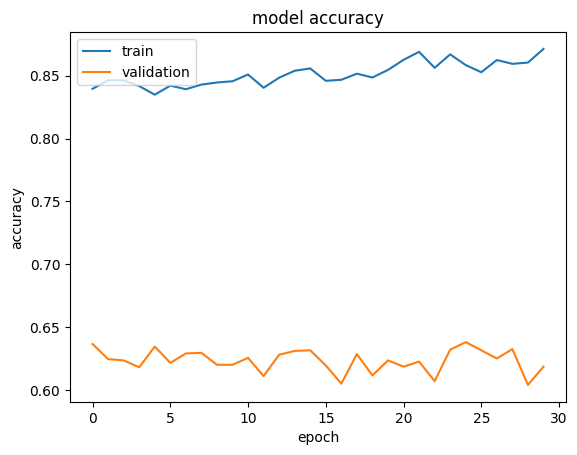

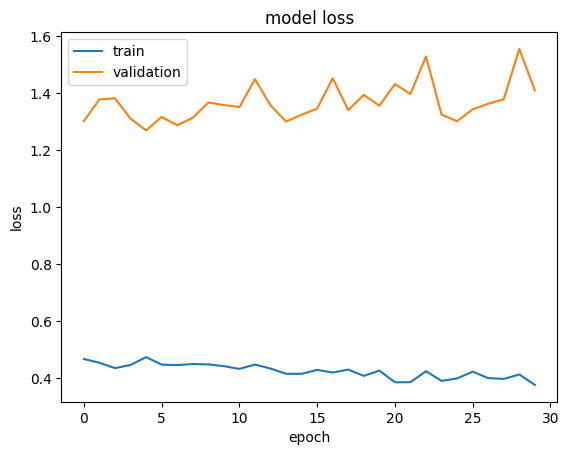

In [ ]:
plot_history(merged_model)

##Testing

In [ ]:
def test_music(audio_file):
  SAMPLE_RATE = 22050 # sample rate that will be used for AnalogToDigital conversion of signals
  TRACK_DURATION = 30
  hop_length = 512
  num_segments = 10
  num_mfcc = 23

  n_fft = 1024 # the duration of each track
  SAMPLES_PER_TRACK = TRACK_DURATION * SAMPLE_RATE
  samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
      # the expected number of mfccs vectors from a segment
  mfcc_per_segment = math.ceil(samples_per_segment / hop_length)

  signal, sr = librosa.load(audio_file, sr = SAMPLE_RATE)
  for d in range(num_segments):
    start = samples_per_segment * d # starting index of a segment
    end = samples_per_segment * (d + 1) # ending index of a segment
    #extracting mfcc of a segment using librosa
    mfcc = librosa.feature.mfcc(y = signal[start:end], sr = sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = mfcc.T
    if(len(mfcc) == mfcc_per_segment):
      # print(mfcc)
      print(f'{audio_file}, segment: {d + 1}')
  # ending index of a segment
  #extracting mfcc of a segment using librosa
  print(mfcc.shape)
  mfcc = np.expand_dims(mfcc, axis=0)
  mfcc = np.expand_dims(mfcc, axis=-1)
  prediction = model_crnn.predict(mfcc)
  return prediction

In [ ]:
prediction = test_music('/content/drive/MyDrive/DL NLP Songs.zip (Unzipped Files)/Maroon 5 - Payphone ft. Wiz Khalifa (Explicit) (Official Music Video).mp3')

/content/drive/MyDrive/DL NLP Songs.zip (Unzipped Files)/Maroon 5 - Payphone ft. Wiz Khalifa (Explicit) (Official Music Video).mp3, segment: 1
/content/drive/MyDrive/DL NLP Songs.zip (Unzipped Files)/Maroon 5 - Payphone ft. Wiz Khalifa (Explicit) (Official Music Video).mp3, segment: 2
/content/drive/MyDrive/DL NLP Songs.zip (Unzipped Files)/Maroon 5 - Payphone ft. Wiz Khalifa (Explicit) (Official Music Video).mp3, segment: 3
/content/drive/MyDrive/DL NLP Songs.zip (Unzipped Files)/Maroon 5 - Payphone ft. Wiz Khalifa (Explicit) (Official Music Video).mp3, segment: 4
/content/drive/MyDrive/DL NLP Songs.zip (Unzipped Files)/Maroon 5 - Payphone ft. Wiz Khalifa (Explicit) (Official Music Video).mp3, segment: 5
/content/drive/MyDrive/DL NLP Songs.zip (Unzipped Files)/Maroon 5 - Payphone ft. Wiz Khalifa (Explicit) (Official Music Video).mp3, segment: 6
/content/drive/MyDrive/DL NLP Songs.zip (Unzipped Files)/Maroon 5 - Payphone ft. Wiz Khalifa (Explicit) (Official Music Video).mp3, segment: 7

In [ ]:
# predictions = model_crnn.predict(X_test).tolist()
predictions = prediction

In [ ]:
X_test[5].shape

(130, 23, 1)

In [ ]:
X_test[0]

array([[[1.        ],
        [0.62939549],
        [0.59626431],
        ...,
        [0.35798547],
        [0.25009472],
        [0.29338956]],

       [[0.98687037],
        [0.67578103],
        [0.35780759],
        ...,
        [0.45821631],
        [0.4424482 ],
        [0.26377015]],

       [[0.97559061],
        [0.6929711 ],
        [0.34048595],
        ...,
        [0.46044411],
        [0.36329564],
        [0.18919098]],

       ...,

       [[0.45711248],
        [0.84450621],
        [0.64213922],
        ...,
        [0.31629858],
        [0.3818124 ],
        [0.27296758]],

       [[0.46101216],
        [0.85200882],
        [0.61344263],
        ...,
        [0.39270573],
        [0.19972162],
        [0.19199621]],

       [[0.52059722],
        [0.75883252],
        [0.85637351],
        ...,
        [0.16975454],
        [0.33491986],
        [0.16753939]]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from seaborn import heatmap

In [ ]:
predicted_classes = [np.array(xi).argmax() for xi in predictions]
# test_accuracy = accuracy_score(predicted_classes, y_test)
# test_accuracy * 100

In [ ]:
predicted_classes = [mappings[np.array(xi).argmax()] for xi in predictions]
y_test_classes = [mappings[di] for di in y_test]
predicted_classes

['/content/drive/MyDrive/GTZAN/genres_original/reggae']

In [ ]:
st_classes, pred_classes = [], []
def cleaner(y_test_classes):
    lst = []
    for stg in y_test_classes:
        x = stg.rfind('/')
        if stg[x+1] == '.':
            xt = stg.rfind('/', stg.rfind('/') - 1)
            lst.append(stg[45:xt])

        else:
            lst.append(stg[x+1:])
    return lst
st_classes = cleaner(y_test_classes)
pred_classes = cleaner(predicted_classes)
pred_classes

['reggae']

In [ ]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)

    plt.figure(figsize=(12.8,6))
    heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

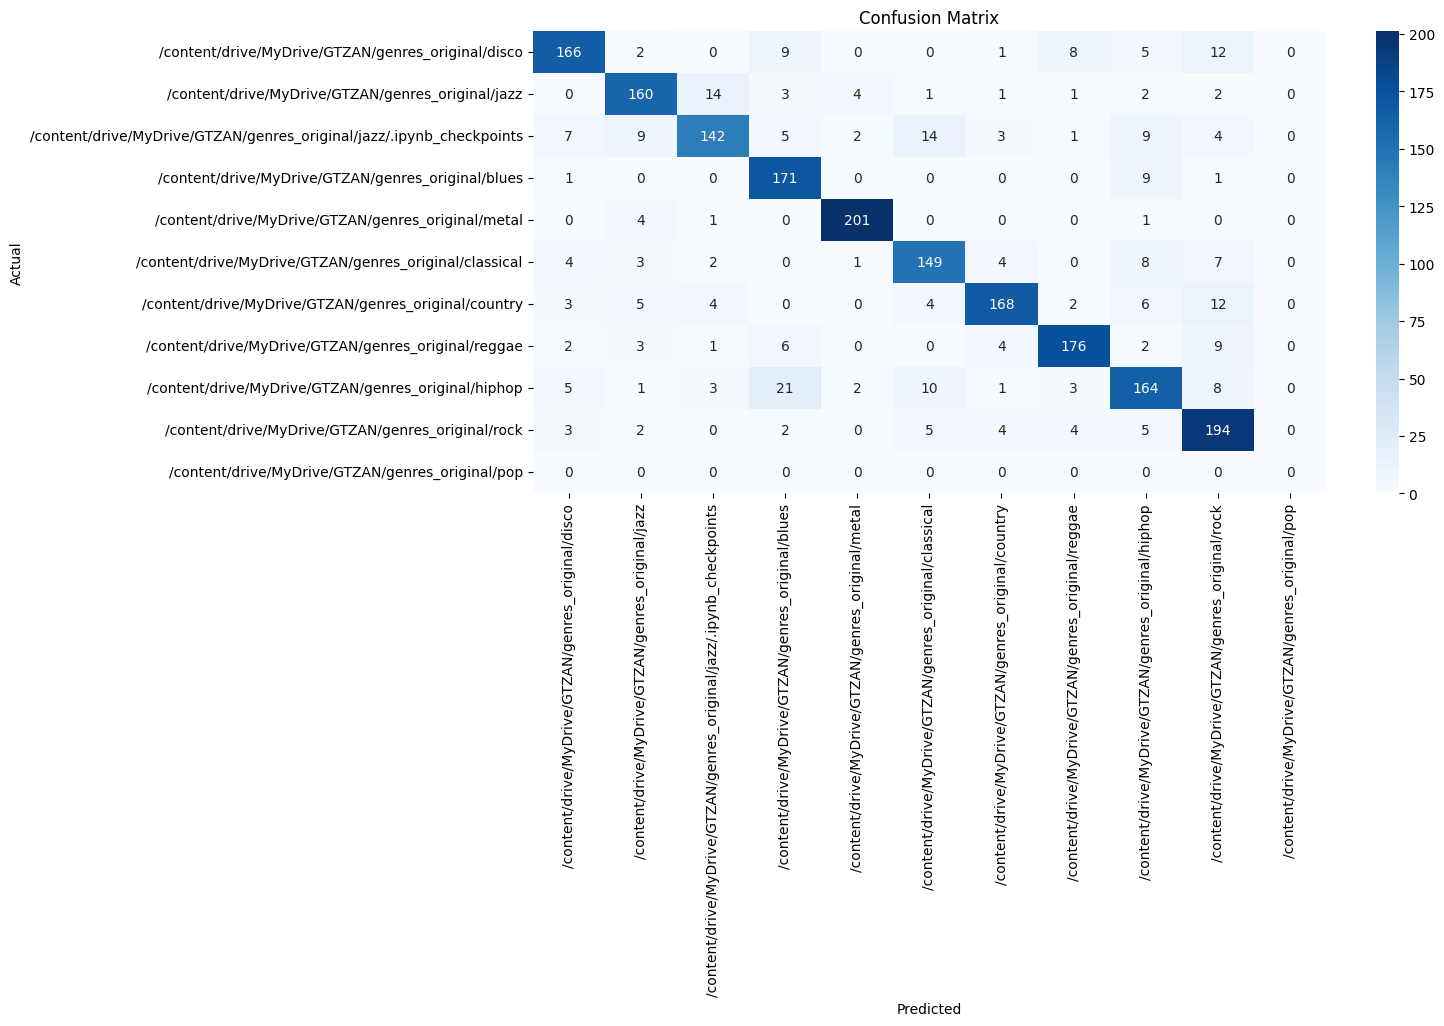

In [ ]:
plot_confusion_matrix(y_test_classes, predicted_classes, mappings)